In [1]:
# Hi Bram :)
# Nice you did it till here. As you can see, comments in python
# are done with the "#" sign.

However, Jupyter has as well this thing where you can have some cells in markdown language instead, isn't this nice?
Below is a guided example for you, but first a few tips.

#### 1 - Indentation 
A useful thing to remember when using python is that the language relies on the indentation to understand when you are ending functions, loops and tests. So, spaces and tabs are not random characters and you have to use them carefully and systematically.
#### 2 - Execution
In jupyter, you can execute the code cell by cell (just like in Matlab where you can execute sections of a script). You can either do this by clicking on the symbol >| up there, or by pressing Shift+Enter when you are on the cell.

#### 3- Refs
You can check this website out: https://medium.com/@rrfd/jupyter-notebook-shortcuts-tips-and-tricks-top-nbextensions-bring-order-to-your-notebooks-pt-1-b58f270963f9 and this one: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [3]:
# Always start by importing whatever it is that you will need
import numpy as np # Numpy is basically the matlab of python.
import matplotlib.pyplot as plt # a very nice tool to plot
%matplotlib inline 
# > this "%" symbol is called magic.
# In practice, this line just makes sure that what I plot is displayed
# in the jupyter notebook
import os
# just to be able to use mkdir

import StartStates as strst 
# > Just some python functions to generate a bunch of states
import KagomeFunctions as kf
# > The functions which are related to the structure of the kagome lattice
import DualwormFunctions as dw
# > The python functions wrapping the MC code
import KagomeDrawing as kdraw
#import dimers as dim 
# > the main MC module, written in C++

### Selecting the parameters and generating the states
Here below, L is the linear size of the triangular sublattice, such that you have 9L^2 kagome lattice sites.

Here I'm not using MC to generate the states, just the rules that I know. Therefore, while the states are very random for the J1-J2 Model, they are not for, say, the Large J2, Intermediate or even large J3 phases.

The "kwinit" parameters just tell the statesinit function how to initialise the states
- Fully randomly or not (not, if you want to generate sthg in the ground state of the given model)
- All the same or not
- Taking into account some magnetic field or not
- If so, the value of the magnetic field

In [4]:
name = "Intermediate"
foldername = "IntermediateGSStates" # give relative path
os.makedirs('./' + foldername, exist_ok = True)
# put exists_ok to false if you don't want to risk writing over existing folders

In [5]:
#Parameters
L = 4 # linear system size, N = 9L^2    
# Intermediate:
J2 = 0.2
J3 = 0.15
couplings = {'J1': 1, 'J2':J2, 'J3':J3, 'J3st':J3, 'J4':0}
kwinit = {'random': False, 'same': False, 'magninit': False}
nt = 20 # number of states

In [6]:
[d_ijl, ijl_d, s_ijl, ijl_s, d_2s, s2_d,
 d_nd, d_vd, d_wn, sidlist, didlist,
 c_ijl, ijl_c, c2s, csign] = dw.latticeinit(L)

[walker2params, walker2ids, id2walker] =\
        dw.walkerstable(np.array(range(nt)), nt, np.array([0]), 1)
hamiltonian = dw.Hamiltonian(couplings, d_ijl, ijl_d, L)
(states, energies, spinstates) = strst.statesinit(nt, 1, np.array([0]), id2walker, d_ijl, d_2s, s_ijl,
               hamiltonian, **kwinit)
# Check that all the states are in the ground state
print("--- Careful when interpreting the results below:--- \n--- J3 not taken into account\
 in the J1-J2 GS --- \n--- J2 not taken into account in the J1-J3 GS---")
print("GS J1-J2:",
      all(abs(energies/(9*L**2) +\
              2/3*couplings['J1']+\
              2/3*couplings['J2'])< 1e-13))
print("GS LJ2:",
      all(abs(energies/(9*L**2) +\
              2/3*couplings['J1']+\
              2/3*couplings['J2']-\
              couplings['J3'])< 1e-13))
print("GS Intermediate:",
      all(abs(energies/(9*L**2) +\
              2/3*couplings['J1']+\
              1/3*couplings['J3'])< 1e-13))
print("GS LJ3:",
      all(abs(energies/(9*L**2) +\
              2/3*couplings['J1']-\
              2/3*couplings['J2']+\
              couplings['J3'])< 1e-13))
print("GS J1-J3:",
      all(abs(energies/(9*L**2) +\
              2/3*couplings['J1']+\
              couplings['J3'])< 1e-13))

Initialisation type:  J1J2J3Intermediate
List to flip: []
List to flip: [[(2, 6, 2), (0, 7, 0), (0, 6, 1), (1, 5, 2), (1, 5, 0), (2, 5, 1)]]
(i,j,l) = ( 0 , 6 , 1 )
(i,j,l) = ( 0 , 7 , 0 )
(i,j,l) = ( 1 , 5 , 0 )
(i,j,l) = ( 1 , 5 , 2 )
(i,j,l) = ( 2 , 5 , 1 )
(i,j,l) = ( 2 , 6 , 2 )
List to flip: []
List to flip: []
List to flip: []
List to flip: []
List to flip: [[(3, 6, 2), (1, 7, 0), (1, 6, 1), (2, 5, 2), (2, 5, 0), (3, 5, 1)]]
(i,j,l) = ( 1 , 6 , 1 )
(i,j,l) = ( 1 , 7 , 0 )
(i,j,l) = ( 2 , 5 , 0 )
(i,j,l) = ( 2 , 5 , 2 )
(i,j,l) = ( 3 , 5 , 1 )
(i,j,l) = ( 3 , 6 , 2 )
List to flip: [[(1, 6, 2), (7, 3, 0), (7, 2, 1), (0, 5, 2), (0, 5, 0), (1, 5, 1)]]
(i,j,l) = ( 0 , 5 , 0 )
(i,j,l) = ( 0 , 5 , 2 )
(i,j,l) = ( 1 , 5 , 1 )
(i,j,l) = ( 1 , 6 , 2 )
(i,j,l) = ( 7 , 2 , 1 )
(i,j,l) = ( 7 , 3 , 0 )
List to flip: [[(3, 0, 2), (5, 5, 0), (1, 0, 1), (-2, 7, 2), (-2, 7, 0), (7, 3, 1)]]
(i,j,l) = ( 3 , 0 , 2 )
(i,j,l) = ( 5 , 5 , 0 )
(i,j,l) = ( 7 , 3 , 1 )
List to flip: []
List to flip: []
Li

### Plotting the states
If you want to plot the states (spin + dimers), execute the cell below. Otherwise, skip it and go to the next cell to translate the results into your formalism

<Figure size 432x288 with 0 Axes>

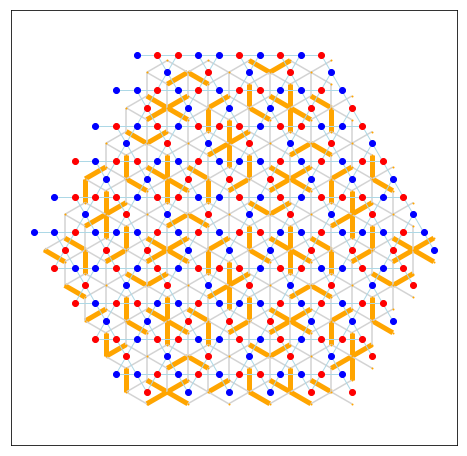

<Figure size 432x288 with 0 Axes>

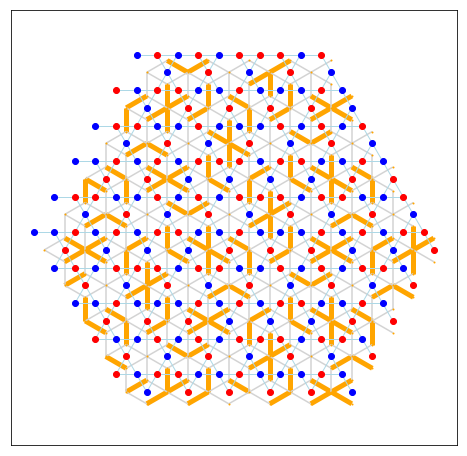

<Figure size 432x288 with 0 Axes>

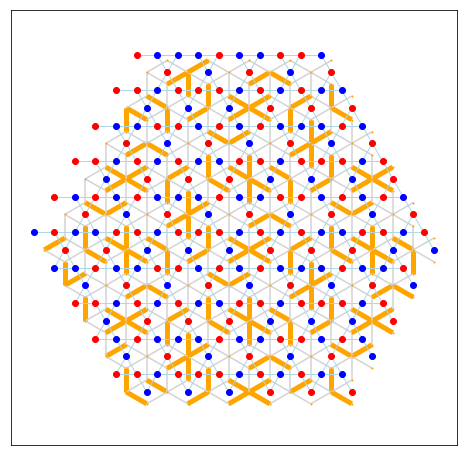

<Figure size 432x288 with 0 Axes>

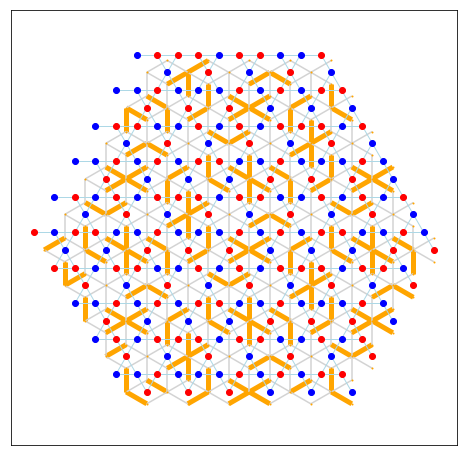

<Figure size 432x288 with 0 Axes>

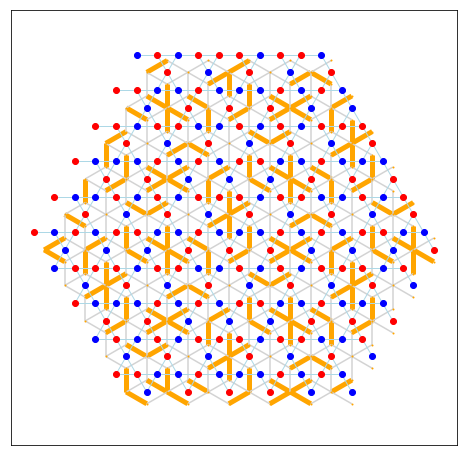

<Figure size 432x288 with 0 Axes>

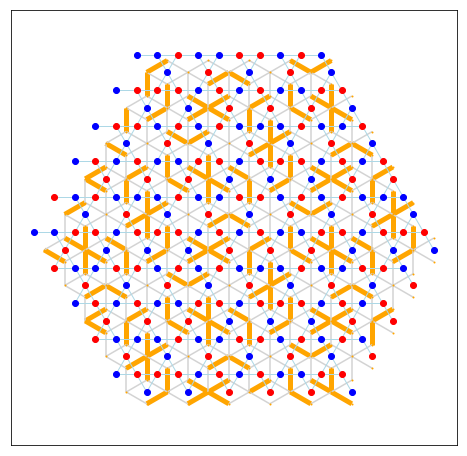

<Figure size 432x288 with 0 Axes>

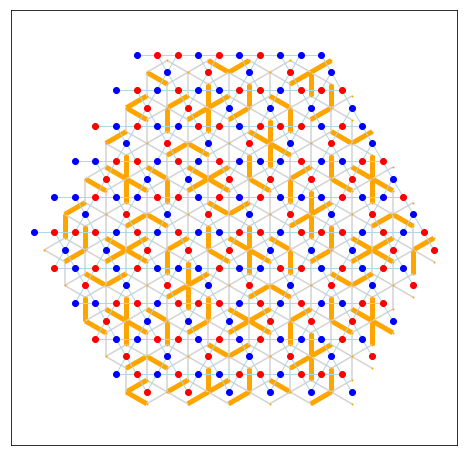

<Figure size 432x288 with 0 Axes>

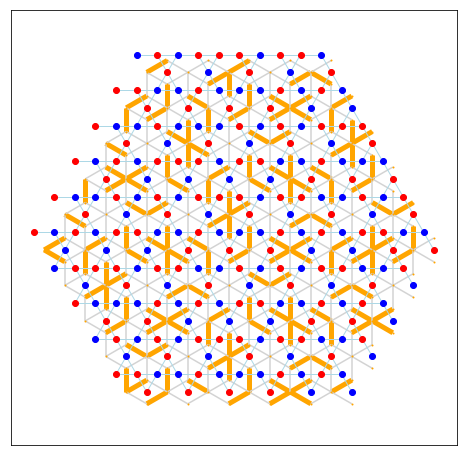

<Figure size 432x288 with 0 Axes>

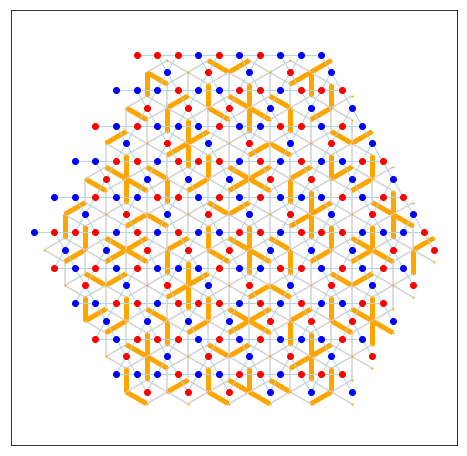

<Figure size 432x288 with 0 Axes>

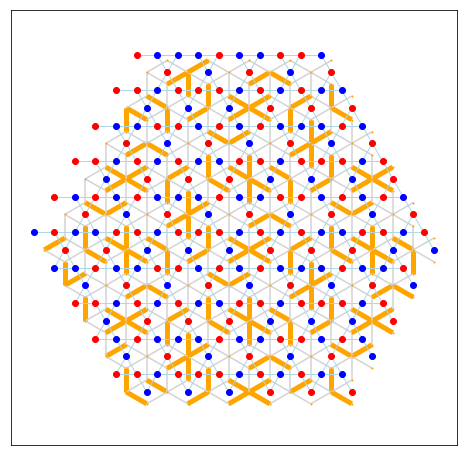

<Figure size 432x288 with 0 Axes>

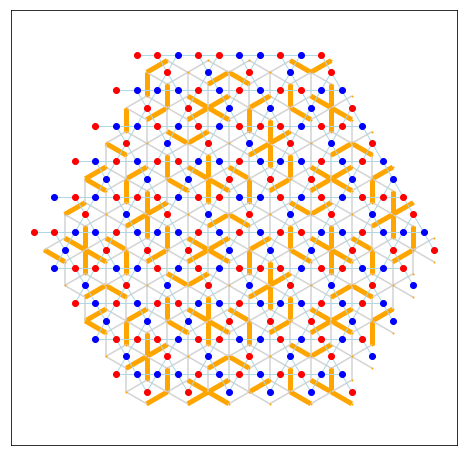

<Figure size 432x288 with 0 Axes>

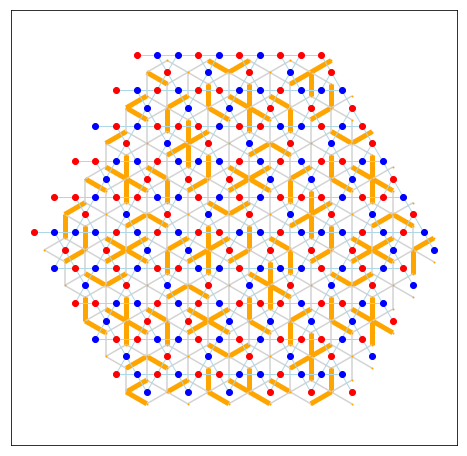

<Figure size 432x288 with 0 Axes>

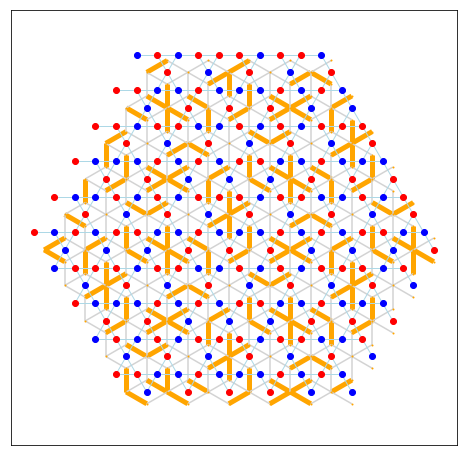

<Figure size 432x288 with 0 Axes>

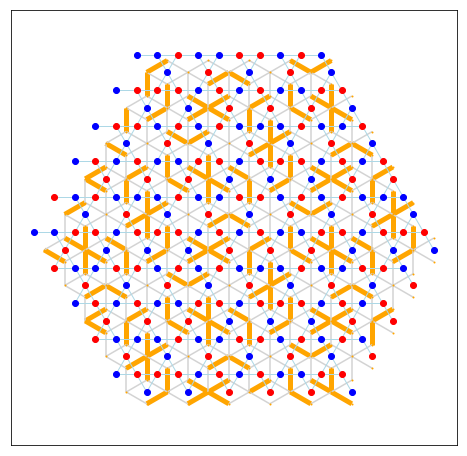

<Figure size 432x288 with 0 Axes>

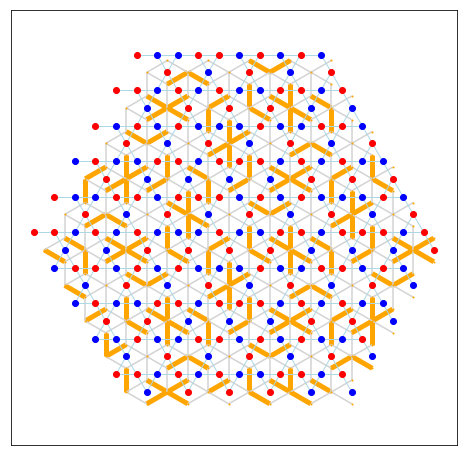

<Figure size 432x288 with 0 Axes>

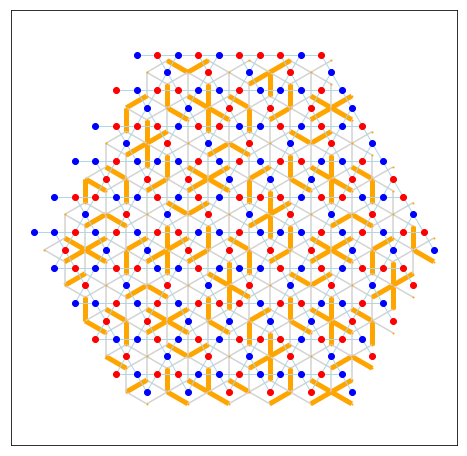

<Figure size 432x288 with 0 Axes>

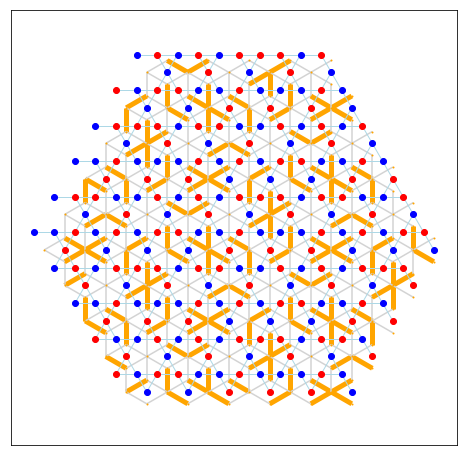

<Figure size 432x288 with 0 Axes>

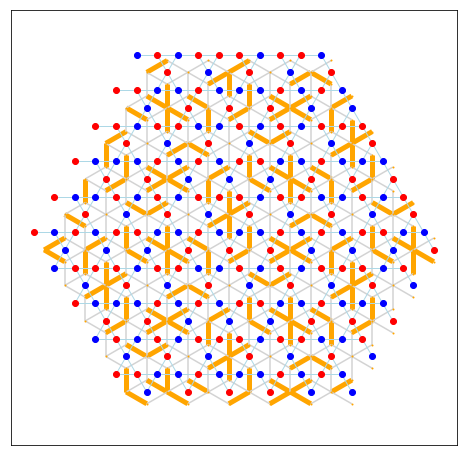

<Figure size 432x288 with 0 Axes>

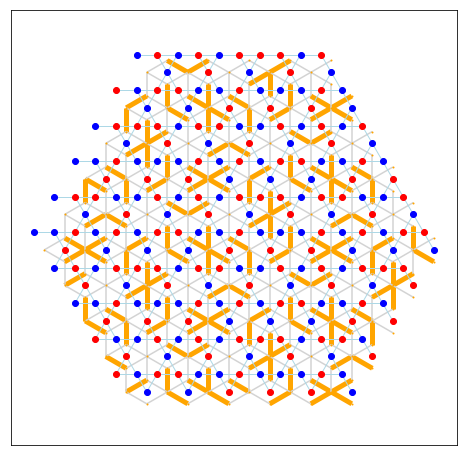

<Figure size 432x288 with 0 Axes>

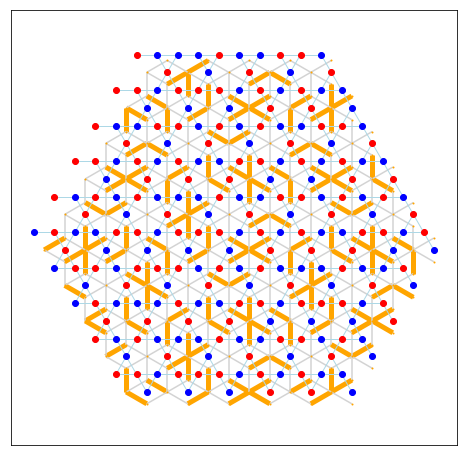

In [7]:
# Plot the spinstates
for idstate in range(nt):
    plt.figure()
    kdraw.plotstate(idstate, L, d_ijl, ijl_s, sidlist, didlist, s2_d,
                   states, spinstates,dim_node_color = 'orange',
                    dim_color = "orange", no_dim_color = 'lightgrey')
    plt.savefig("./" + foldername + "/" + name+"State{0}.png".format(idstate))
    plt.show()

### Mapping my configurations to your notations
The cell below defines a function which maps the coordinates (i,j,l) of a spin in my notation to the coordinates (x,y) of a spin in your notation

In [8]:
def getKagomeMap(L,s_ijl):
    '''
        getKagomeMap(L,s_ijl)
        Returns a mapping from the (i,j,l) notation for the kagome structure
        to the (x,y) notation. In the (x,y) notation, sites with
        both x odd and y odd don't exist.
        
        Inputs:
        - L: the linear size of the triangular sub-lattice
        - s_ijl:  the mapping between the linear
        indexing and the ijl indexing
        
        Outputs:
        - xyarray : s-> x,y
        - ijl_xy (dict)
        - xy_ijl (dict)
        - xy_s (dict)
    '''
    xyarray = np.zeros((len(s_ijl), 2), dtype = "int32")
    ijl_xy = {}
    xy_ijl = {}
    xy_s = {}
    for s, (i,j,l) in enumerate(s_ijl):
        # shifting to get reasonable results for x,y
        i = i-L;
        j = j-L;
        # computing xy
        if l == 0:
            x = 2*(i+j)
            y = 2*j - 1
        elif l == 1:
            x = 2*(i+j)
            y = 2*j
        elif l == 2:
            x = 2*(i+j)-1
            y = 2*j
        # building the maps
        xyarray[s,:] = np.array([x,y])
        ijl_xy[(i,j,l)] = np.array([x,y])
        xy_ijl[(x,y)] = np.array((i,j,l))
        xy_s[(x,y)] = s
    return xyarray, ijl_xy, xy_ijl, xy_s

In [9]:
def mapStateToMatrix(L,s_ijl, spinstate):
    '''
        mapStateToMatrix(L,s_ijl, spinstate)
        Returns the spin state in the form of a matrix
        
        Inputs:
        - L: the linear size of the triangular sub-lattice
        - s_ijl:  the mapping between the linear
        indexing and the ijl indexing
        - spinstate: the spin configuration to translate
        
        Outputs:
        - matrix form of the state;
        the odd (x,y) indices are padded with zeros
    '''
    xyarray, ijl_xy, xy_ijl, xy_s = getKagomeMap(L,s_ijl)
    
    xyarray[:,0] = xyarray[:,0] - (min(xyarray[:,0])-1)
    xyarray[:,1] = xyarray[:,1] - (min(xyarray[:,1])-1)
    
    xystate = np.zeros((max(xyarray[:,0])+1, max(xyarray[:,1])+1),dtype = "int8")
    for sid, s in enumerate(spinstate):
        [x,y] = xyarray[sid]
        xystate[x,y] = s
    
    return xystate

In [10]:
def mapStatesToMatrices(L, s_ijl, spinstates):
    '''
        mapStatesToMatrices(L,s_ijl, spinstates)
        Returns the spin states in the form of matrices
        
        Inputs:
        - L: the linear size of the triangular sub-lattice
        - s_ijl:  the mapping between the linear
        indexing and the ijl indexing
        - spinstates: a list of spin configurations to translate
        
        Outputs:
        - list of matrix forms of the states;
        the odd (x,y) indices are padded with zeros
    '''
    mlist = []
    for i in range(len(spinstates)):
        mlist.append(mapStateToMatrix(L, s_ijl, spinstates[i]))
    
    return mlist

Below you actually compute the matrix form for each state and save it in txt (should be csv).
If you want to cut the states to regions without zeros:
    *mlist[n][xmin:xmax, ymin:ymax]*

In [11]:
mlist = mapStatesToMatrices(L,s_ijl, spinstates)
xmin = L
xmax = 3*L
ymin = L
ymax = 3*L
for n in range(nt):
    np.savetxt("./"+foldername + "/" + name +\
        "state_MatrixForm{0}.txt".format(n),
        mlist[n][xmin:xmax, ymin:ymax])
    # comment if you don't want to print:
    print(mlist[n][xmin:xmax, ymin:ymax])

[[ 1 -1 -1 -1  1 -1 -1  0]
 [-1  0  1  0 -1  0  1  0]
 [ 1  1 -1  1  1  1 -1  1]
 [ 1  0 -1  0 -1  0 -1  0]
 [ 1 -1 -1  1  1 -1  1 -1]
 [-1  0  1  0 -1  0  1  0]
 [ 1  1 -1  1 -1  1 -1 -1]
 [-1  0 -1  0  1  0  1  0]]
[[ 1 -1 -1  1  1 -1  1  0]
 [-1  0  1  0 -1  0  1  0]
 [ 1  1 -1  1 -1  1 -1 -1]
 [-1  0 -1  0  1  0  1  0]
 [ 1 -1  1 -1  1 -1 -1  1]
 [-1  0  1  0 -1  0  1  0]
 [-1  1 -1 -1  1  1 -1  1]
 [ 1  0  1  0  1  0 -1  0]]
[[-1  1 -1  1 -1  1  1  0]
 [ 1  0 -1  0  1  0 -1  0]
 [ 1 -1  1  1 -1 -1  1 -1]
 [-1  0 -1  0 -1  0  1  0]
 [-1  1  1  1 -1  1  1 -1]
 [ 1  0 -1  0  1  0 -1  0]
 [-1 -1  1 -1 -1 -1  1 -1]
 [-1  0  1  0  1  0  1  0]]
[[ 1 -1  1 -1  1 -1 -1  0]
 [-1  0  1  0 -1  0  1  0]
 [-1  1 -1 -1  1  1 -1  1]
 [ 1  0  1  0  1  0 -1  0]
 [ 1 -1 -1 -1  1 -1 -1  1]
 [-1  0  1  0 -1  0  1  0]
 [ 1  1 -1  1  1  1 -1  1]
 [ 1  0 -1  0 -1  0 -1  0]]
[[ 1  1 -1  1 -1  1 -1  0]
 [-1  0 -1  0  1  0  1  0]
 [ 1 -1  1 -1  1 -1 -1 -1]
 [-1  0  1  0 -1  0  1  0]
 [-1  1 -1 -1  1  1 -1  

Below you can compare a state in the spin form and in matrix form. The spin form is plotted with PBC and because of the natural choice of axis in imshow it is not that easy to compare, but you can see that it is working

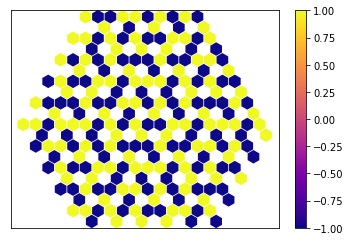

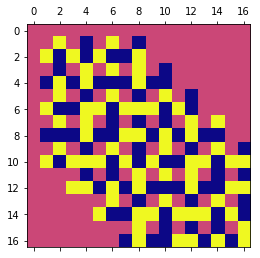

In [12]:
n = 0 # state index
kdraw.plot_function_kag(spinstates[n],L,1)
plt.matshow(mlist[n],cmap = 'plasma',vmin = -1, vmax = 1)